In [1]:
import os
import pathlib

file_path = os.path.dirname(os.path.realpath("__file__"))
home_dir = pathlib.Path(file_path).parent.parent
os.chdir(home_dir)

In [2]:
import pandas as pd
from src.utils import SAVED_EVAL_BASE_PATH

df = pd.read_csv(SAVED_EVAL_BASE_PATH.joinpath("evaluation_result.csv"))
df

,Unnamed: 0,dataset,layer,eval,classifier,refAE,0,1,5,10,25,50,99,99.9,99.99,100
0,0,fashion_mnist,my_dense,total_loss,0.228498,7.124279,21.836708,21.761026,20.813839,19.769808,16.493725,11.121116,0.631990,0.431054,0.365682,0.347074
1,1,fashion_mnist,my_dense,reconstruction_loss,NaN,7.124279,21.836708,21.972736,21.874737,21.904966,21.857809,21.926941,30.009632,90.457542,275.725006,375.310516
2,2,fashion_mnist,my_dense,classification_loss,0.228498,NaN,0.875324,0.802315,0.656808,0.553377,0.401475,0.315300,0.335246,0.340938,0.338143,0.347074
3,3,fashion_mnist,my_dense,evaluation_accuracy,0.920600,0.888700,0.903300,0.904600,0.905400,0.905600,0.907600,0.907800,0.913900,0.914000,0.912600,0.912900
4,4,fashion_mnist,my_conv,total_loss,0.228498,1.125318,3.543053,3.508368,3.383557,3.239841,2.740736,1.926461,0.335954,0.295887,0.368075,0.332982
5,5,fashion_mnist,my_conv,reconstruction_loss,NaN,1.125318,3.543053,3.540704,3.545505,3.566517,3.560159,3.585461,8.962866,26.455465,100.750717,93.023277
6,6,fashion_mnist,my_conv,classification_loss,0.228498,NaN,0.308961,0.307043,0.306536,0.299761,0.282462,0.267461,0.248813,0.269701,0.358036,0.332982
7,7,fashion_mnist,my_conv,evaluation_accuracy,0.920600,0.908000,0.904500,0.892100,0.904600,0.905800,0.908000,0.908400,0.908400,0.909900,0.910800,0.906400
8,8,mnist,my_dense,total_loss,0.037522,3.131160,20.522276,20.367018,19.583939,18.485197,15.485126,10.302245,0.294454,0.171916,0.148933,0.129434
9,9,mnist,my_dense,reconstruction_loss,NaN,3.131160,20.522276,20.571531,20.608286,20.526329,20.612139,20.515209,24.082470,87.526779,304.325165,312.463287


In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from src.utils import SAVED_PICS_PATH, keras_dataset_image_preprocessing, DENSE_LAYER_NAME, CONV_LAYER_NAME
from src.utils import SAVED_CLASSIFIER_PATH_FASHION, SAVED_CLADEC_PATH_FASHION, SAVED_REFAE_PATH_FASHION
from src.cladec import ClaDec, RefAE

_, (test_images,
    test_labels_c) = keras_dataset_image_preprocessing(keras.datasets.fashion_mnist)
SAVED_EVAL_PICS_PATH = SAVED_PICS_PATH.joinpath('fashion_mnist')

ALPHAS = [0, 25, 50, 99, 99.9, 100]

In [4]:
test_labels = np.argmax(test_labels_c, axis=1)
encoding = ["T-Shirt (Top)", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
            "Shirt", "Sneaker", "Bag", "Ankle Boot"]
classifier = keras.models.load_model(SAVED_CLASSIFIER_PATH_FASHION)
for cl in range(10):
  class_indices = np.where(test_labels == cl)
  test_images_cl = test_images[class_indices]
  print(f"Evaluating classifier on class {cl} {encoding[cl]}")
  classifier.evaluate(test_images_cl, test_labels_c[class_indices])

2022-08-03 18:31:15.788371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 18:31:15.832792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 18:31:15.833121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 18:31:15.834034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Evaluating classifier on class 0 T-Shirt (Top)


2022-08-03 18:31:18.822993: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


32/32 [==============================] - 2s 7ms/step - loss: 0.3802 - categorical_accuracy: 0.8510
Evaluating classifier on class 1 Trouser
32/32 [==============================] - 0s 4ms/step - loss: 0.0514 - categorical_accuracy: 0.9900
Evaluating classifier on class 2 Pullover
32/32 [==============================] - 0s 4ms/step - loss: 0.2678 - categorical_accuracy: 0.9200
Evaluating classifier on class 3 Dress
32/32 [==============================] - 0s 5ms/step - loss: 0.2233 - categorical_accuracy: 0.9370
Evaluating classifier on class 4 Coat
32/32 [==============================] - 0s 5ms/step - loss: 0.4804 - categorical_accuracy: 0.8210
Evaluating classifier on class 5 Sandal
32/32 [==============================] - 0s 4ms/step - loss: 0.0425 - categorical_accuracy: 0.9880
Evaluating classifier on class 6 Shirt
32/32 [==============================] - 0s 4ms/step - loss: 0.6076 - categorical_accuracy: 0.7730
Evaluating classifier on class 7 Sneaker
32/32 [====================

In [5]:
# only look at images with shirts because they are wrongly classified
worse_mask = (test_labels == 0) | (test_labels == 4) | (test_labels == 6)
class_indices = np.where(test_labels == 6)
test_images = test_images[class_indices]
test_labels = test_labels[class_indices]

classifier_test_out = np.argmax(classifier.predict(test_images), axis=1)
label_comparison = classifier_test_out == test_labels
correct_indices = label_comparison.nonzero()[0]
label_comparison = classifier_test_out != test_labels
wrong_indices = label_comparison.nonzero()[0]

32/32 [==============================] - 0s 3ms/step


In [6]:
# select some correctly and some misclassified images randomly
n_correct = 3
n_wrong = 5
n = n_correct + n_wrong
rand_indices_correct = np.random.choice(correct_indices, n_correct, replace=False)
rand_indices_wrong = np.random.choice(wrong_indices, n_wrong, replace=False)
rand_indices = np.concatenate((rand_indices_correct, rand_indices_wrong))
classes_correct = test_labels[rand_indices]
classes_classified = classifier_test_out[rand_indices]
eval_images = test_images[rand_indices]

In [7]:
# get ClaDec reconstructions for all models saved in `saved-models` directory
cladec_eval_data_dense = []
cladec_eval_data_conv = []
decoder_dense = ClaDec.create_128_dense_decoder()
decoder_conv = ClaDec.create_64_conv_decoder()
for alpha in ALPHAS:
  cladec_path = SAVED_CLADEC_PATH_FASHION.joinpath(f'{alpha:2}')
  cladec_dense = ClaDec.create_from_weights(cladec_path.joinpath(DENSE_LAYER_NAME).joinpath(DENSE_LAYER_NAME), classifier, DENSE_LAYER_NAME, alpha, decoder_dense)
  cladec_eval_data_dense.append(cladec_dense(eval_images))

  cladec_conv = ClaDec.create_from_weights(cladec_path.joinpath(CONV_LAYER_NAME).joinpath(CONV_LAYER_NAME), classifier, CONV_LAYER_NAME, alpha, decoder_conv)
  cladec_eval_data_conv.append(cladec_conv(eval_images))

In [8]:
# load RefAE model
refae_dense = RefAE.create_from_weights(SAVED_REFAE_PATH_FASHION.joinpath(DENSE_LAYER_NAME).joinpath(DENSE_LAYER_NAME), cladec_dense)
refae_conv = RefAE.create_from_weights(SAVED_REFAE_PATH_FASHION.joinpath(CONV_LAYER_NAME).joinpath(CONV_LAYER_NAME), cladec_conv)
# get reference reconstructions
eval_refae_dense = refae_dense(eval_images)
eval_refae_conv = refae_conv(eval_images)

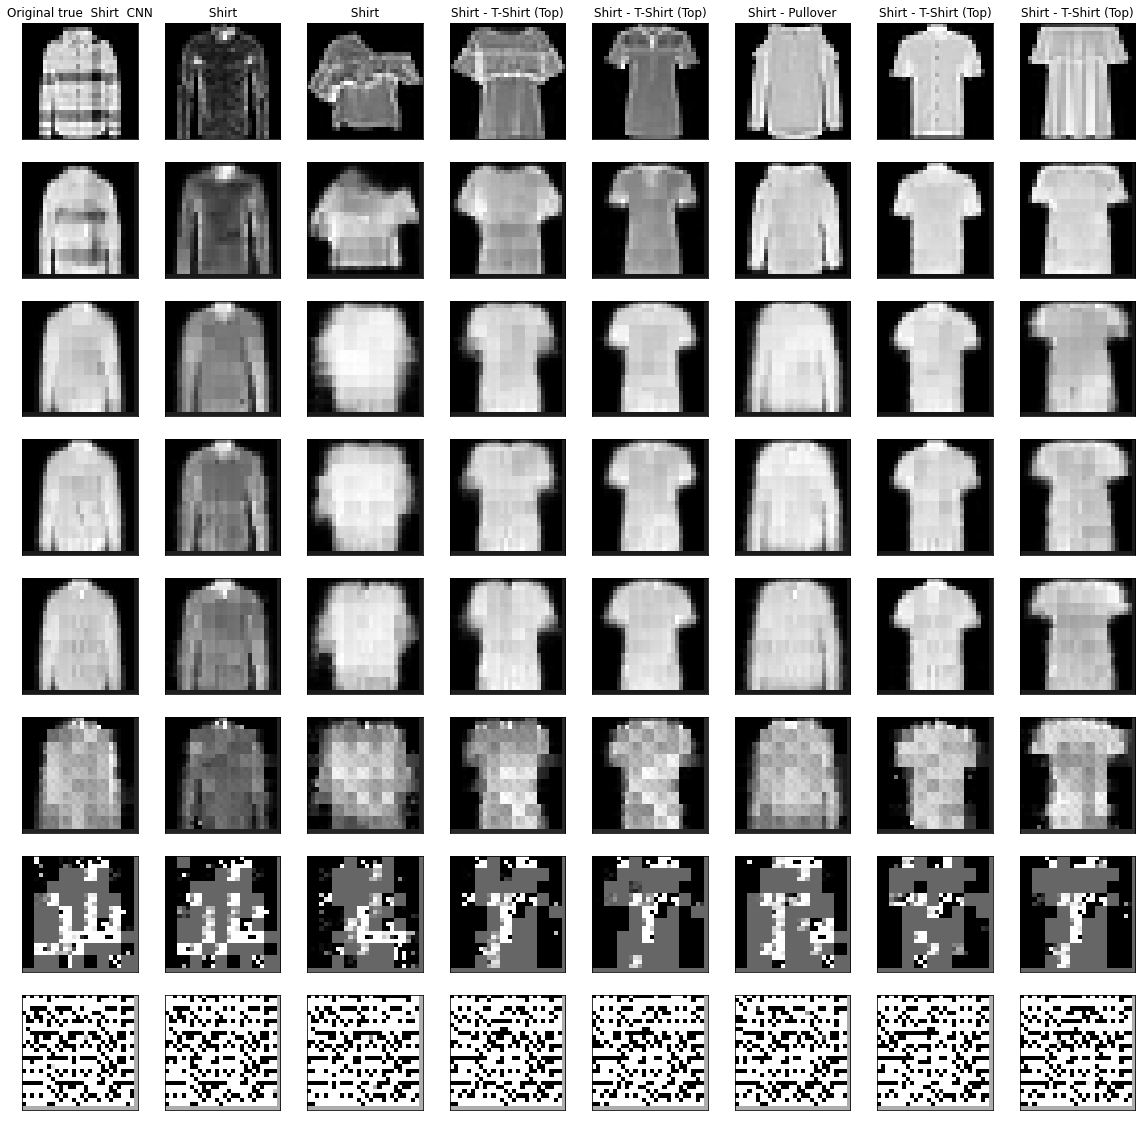

In [9]:
num_rows = 2 + len(ALPHAS)
plt.figure(figsize=(20, 20))
for i in range(0, n):
  # Display original
  x = i + 1
  ax = plt.subplot(num_rows, n, x)
  if classes_correct[i] == classes_classified[i]:
    title = f' {encoding[classes_correct[i]]} '
  else:
    title = f'{encoding[classes_correct[i]]} - {encoding[classes_classified[i]]}'
  if x == 1:
    ax.set_title("Original true " + title + " CNN")
  else:
    ax.set_title(title)

  plt.imshow(eval_images[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display refae
  ax = plt.subplot(num_rows, n, x + n)
  plt.imshow(eval_refae_dense[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display cladec
  j = 2
  for alpha, data in zip(ALPHAS, cladec_eval_data_dense):
    ax = plt.subplot(num_rows, n, x + j * n)
    j += 1
    plt.imshow(data[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()